In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 200

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [3]:
from sklearn.datasets import make_classification, make_blobs

In [4]:
def plot_decision_boundary(clf, X, Y, h=0.1):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,     yy,        Z, cmap=plt.cm.Blues, alpha=0.8);
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.autumn);
    plt.title('Decision boundary');

# Логистическая регрессия

## Постановка задачи и решение из коробки

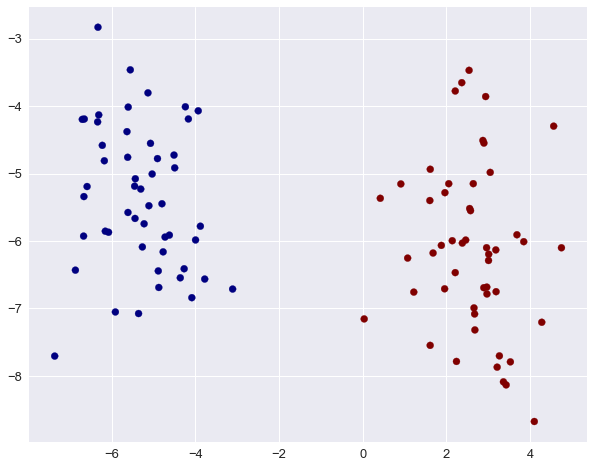

In [47]:
X1, Y1 = make_blobs(n_features=2, centers=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, cmap=plt.cm.jet_r);

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
lr = LogisticRegression()
lr.fit(X1, Y1);

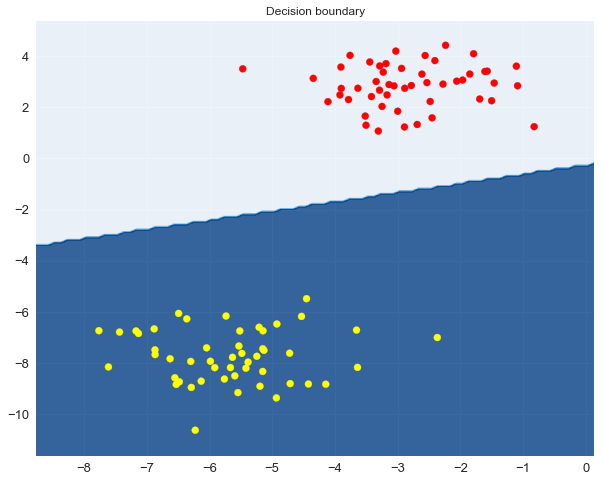

In [8]:
plot_decision_boundary(lr, X1, Y1);

## Простейший случай и математика под капотом

Создадим небольшой игрушечный датасет, показывающий, кто из студентов как сдал экзамен после просмотра некоторого количества сезонов сериала.

In [9]:
df = pd.DataFrame(data={
    'seasons': [0,0,1,0,1,2,2,3,2,3,3,4,5,6,7,8,9,10,11,12,15],
    'failed':  [0,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1]
})

In [11]:
# df

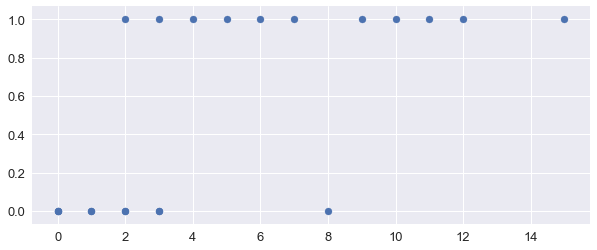

In [12]:
plt.figure(figsize=(10,4));
plt.scatter(df.seasons, df.failed);

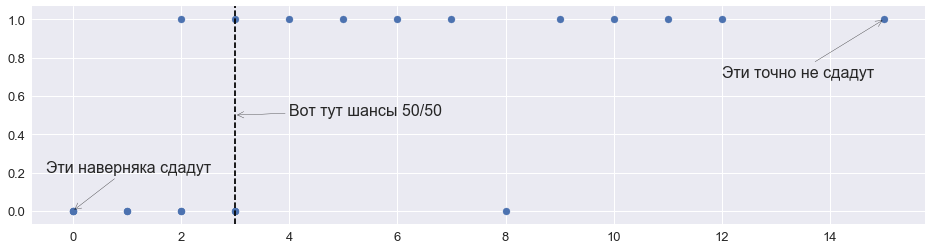

In [13]:
plt.figure(figsize=(16,4));
plt.scatter(df.seasons, df.failed);
plt.axvline(x=3, c='black', ls='--');
plt.annotate(s='Эти точно не сдадут', xy=(15, 1), xytext=(12, 0.7), arrowprops={'arrowstyle': '->'});
plt.annotate(s='Эти наверняка сдадут', xy=(0, 0), xytext=(-0.5, 0.2), arrowprops={'arrowstyle': '->'});
plt.annotate(s='Вот тут шансы 50/50', xy=(3, 0.5), xytext=(4, 0.5), arrowprops={'arrowstyle': '->'});

$$ \hat{y} = \sigma(\theta^T x) $$

<img src="images/sigmoid.gif">

In [14]:
clf = LogisticRegression()
clf.fit(df[['seasons']], df.failed);

In [22]:
X_test = np.array([np.linspace(-5, 15)]).T
y_test = clf.predict_proba(X_test)

In [23]:
X_test_ones = np.hstack((X_test, np.ones_like(X_test)))

In [24]:
clf.coef_[0][0], clf.intercept_[0]

(0.37029001486570801, -1.2059383947040663)

In [25]:
theta = np.array([[clf.coef_[0][0], clf.intercept_[0]]]).T

In [26]:
theta

array([[ 0.37029001],
       [-1.20593839]])

In [27]:
y_hat = X_test_ones.dot(theta)

In [28]:
sigmoid = lambda x: 1./(1.+np.exp(-x))

In [29]:
y_act = sigmoid(y_hat)

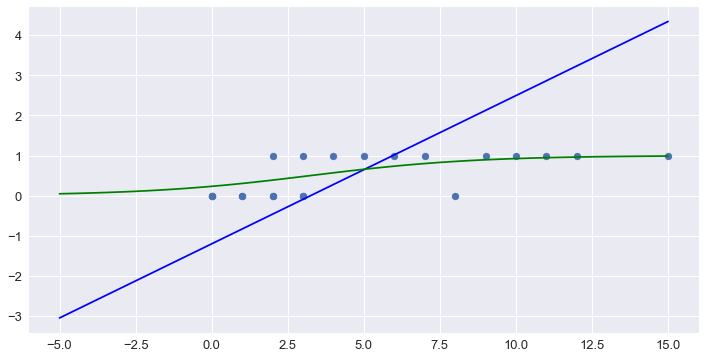

In [30]:
plt.figure(figsize=(12, 6));
plt.scatter(df.seasons, df.failed, label=None);
plt.plot(X_test.ravel(), y_hat.ravel(), c='b');
plt.plot(X_test.ravel(), y_act.ravel(), c='g');

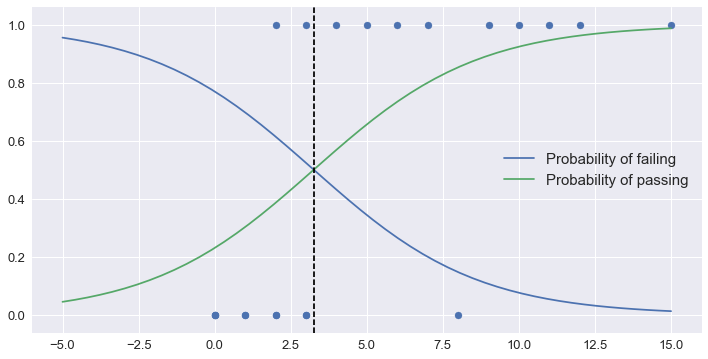

In [31]:
plt.figure(figsize=(12, 6));
plt.scatter(df.seasons, df.failed, label=None);
plt.plot(X_test.ravel(), y_test[:, 0].ravel(), label="Probability of failing");
plt.plot(X_test.ravel(), y_test[:, 1].ravel(), label="Probability of passing");
plt.axvline(x=3.28, c='black', ls='--');
plt.legend();

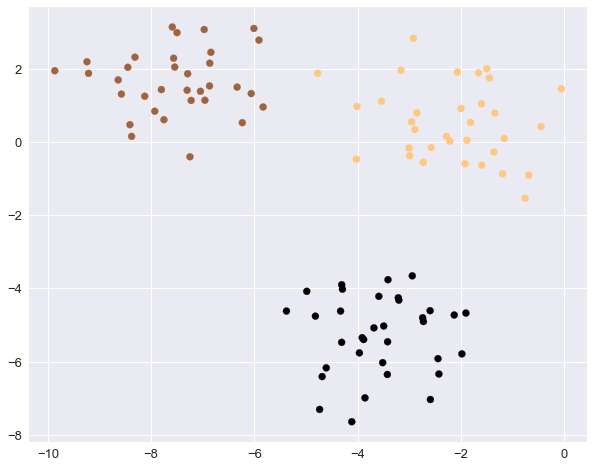

In [32]:
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap=plt.cm.copper);

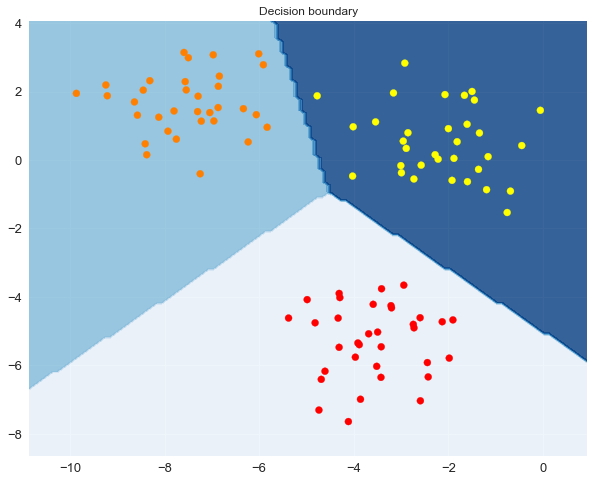

In [33]:
lr = LogisticRegression(C=1000)
lr.fit(X1, Y1);
plot_decision_boundary(lr, X1, Y1);

In [48]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
X = np.random.randn(200, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(np.int64)

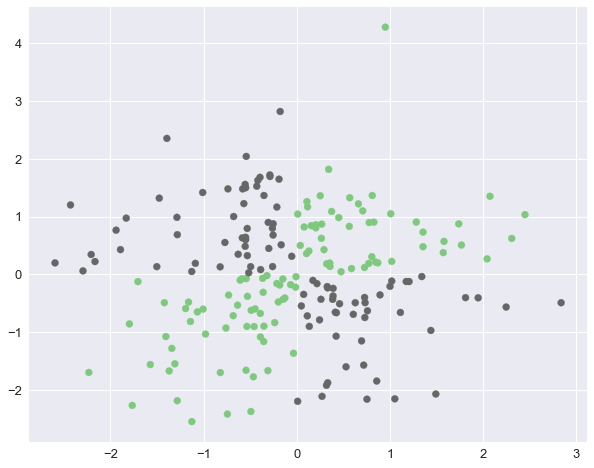

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Accent);

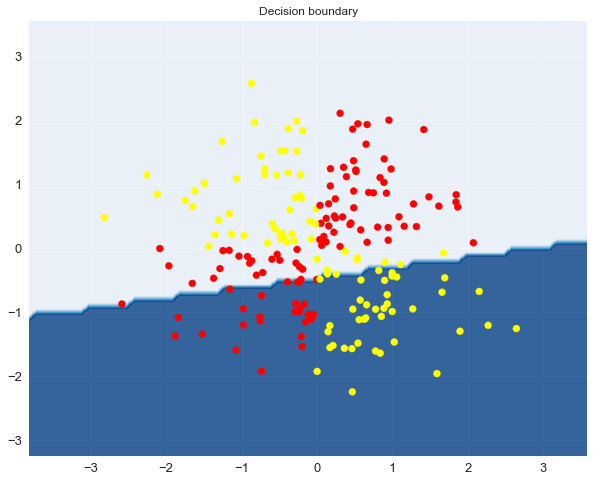

In [36]:
lr = LogisticRegression()
lr.fit(X, Y);
plot_decision_boundary(lr, X, Y);

$$ \hat{y} = \sigma(\theta^T x) $$

In [37]:
import keras

Using Theano backend.


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [39]:
model = Sequential([
    Dense(4, input_shape=(2,), activation='tanh'),
    Dense(1, activation='sigmoid'),
])

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

In [40]:
model.fit(X, Y, batch_size=10, nb_epoch=1000, verbose=0);

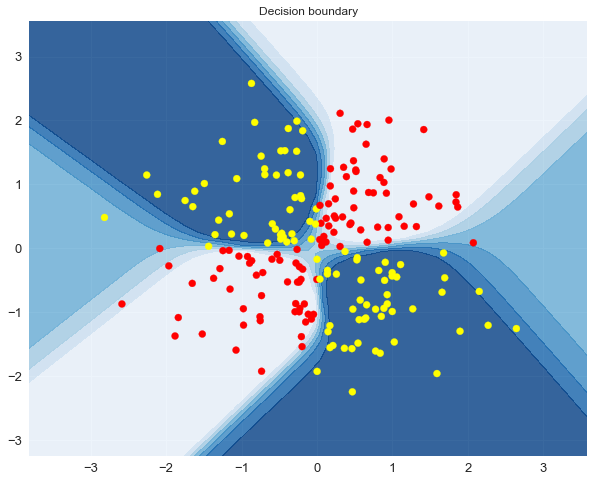

In [41]:
plot_decision_boundary(model, X, Y);